# Carlos David Amezcua Canales - A01641742

# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks 

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective. 


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [1]:
# Import the packages that we will be using

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing data

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [3]:
# url string that hosts our .csv file

url = Ruta + "/datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame

df = pd.read_csv(url, header = None, 
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Exploring the content of the data set

Get a general 'feel' of the data


In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [18]:
# Number of times that each distinct value of a variable occurs in a data set

df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [19]:
# Proportion of each distinct value of a variable occurs in a data set

df["class"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

Iris-setosa        33.33%
Iris-versicolor    33.33%
Iris-virginica     33.33%
Name: class, dtype: object

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [26]:
# Total number of observations

print(df.shape[0])

# Total number of null observations

print(df.isnull().sum())

# Total number of counts (excluding missing values)

df.dropna().value_counts()


150
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


sepal_length  sepal_width  petal_length  petal_width  class          
5.8           2.7          5.1           1.9          Iris-virginica     2
6.2           2.2          4.5           1.5          Iris-versicolor    1
              2.9          4.3           1.3          Iris-versicolor    1
              3.4          5.4           2.3          Iris-virginica     1
6.3           2.3          4.4           1.3          Iris-versicolor    1
                                                                        ..
5.4           3.9          1.3           0.4          Iris-setosa        1
                           1.7           0.4          Iris-setosa        1
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 149, dtype: int64

# Histogram

It is often good to get a feel for the shape of the distribution of the data.

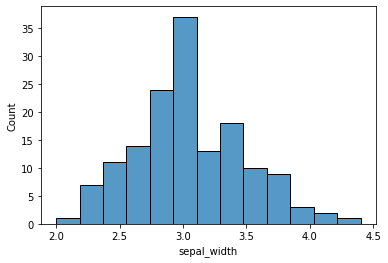

In [49]:
# Plot histogram of the total bill only

sns.histplot(df["sepal_width"])
plt.show()

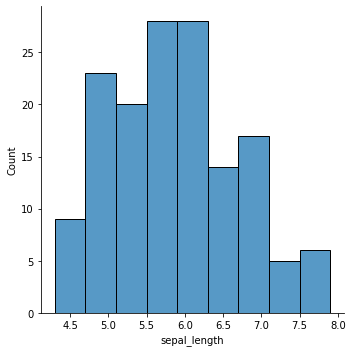

In [50]:
# Plot distribution of the tips only

sns.displot(df["sepal_length"])
plt.show()

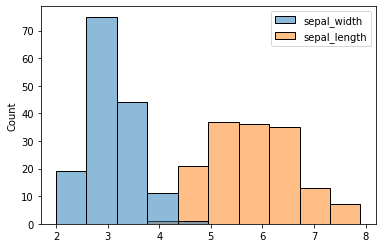

In [51]:
# Plot histogram of both the Age and the Wingspan

sns.histplot(df[["sepal_width", "sepal_length"]])
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

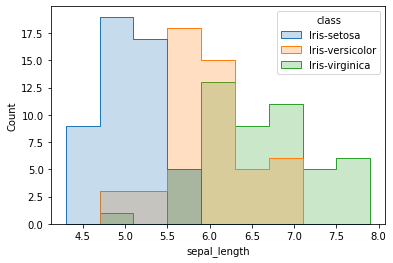

In [52]:
# Create histograms of the "Wingspan" grouped by "Gender"

sns.histplot(data=df, x="sepal_length", hue="class", element="step")

plt.show()

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

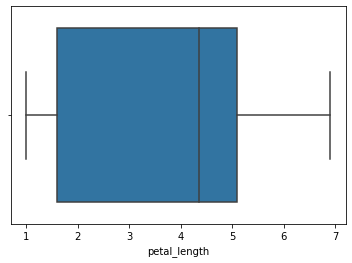

In [54]:
# Create the boxplot of the "total bill" amounts

sns.boxplot(x=df["petal_length"])
plt.show()

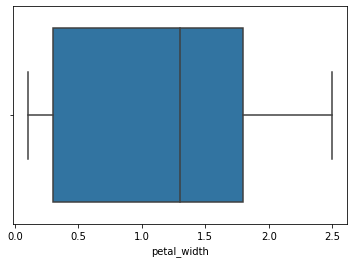

In [58]:
# Create the boxplot of the "tips" amounts

sns.boxplot(x=df["petal_width"])
plt.show()

<Axes: >

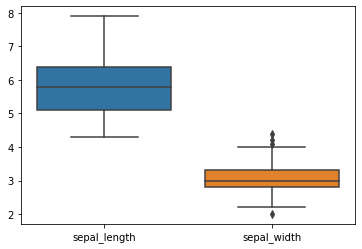

In [61]:
# Create the boxplots of the "Wingspan" and of the "Height" amounts

sns.boxplot(data=df[["sepal_length", "sepal_width"]])

<Axes: >

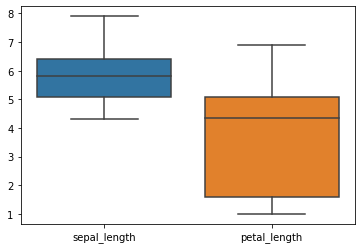

In [62]:
# Create the boxplots of the "Wingspan" and of the "tips" amounts

sns.boxplot(data=df[["sepal_length", "petal_length"]])

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

<Axes: xlabel='class', ylabel='sepal_length'>

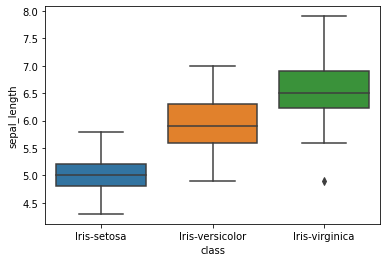

In [63]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"

sns.boxplot(x="class", y="sepal_length", data=df)

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


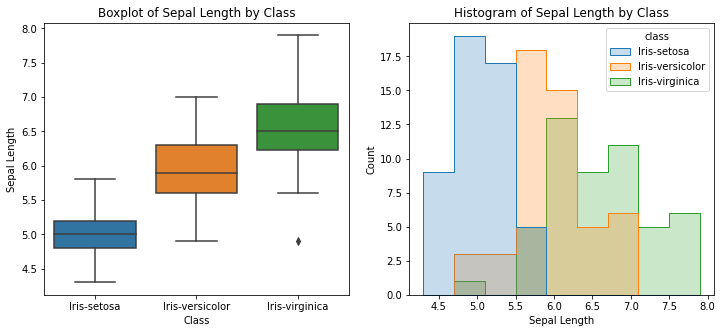

In [64]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"

# Set up the figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Create the boxplot in the first subplot
sns.boxplot(x="class", y="sepal_length", data=df, ax=axs[0])

# Create the histogram in the second subplot
sns.histplot(data=df, x="sepal_length", hue="class", element="step", ax=axs[1])

# Add titles and axis labels
axs[0].set_title('Boxplot of Sepal Length by Class')
axs[1].set_title('Histogram of Sepal Length by Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Sepal Length')
axs[1].set_xlabel('Sepal Length')
axs[1].set_ylabel('Count')

# Display the plot
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

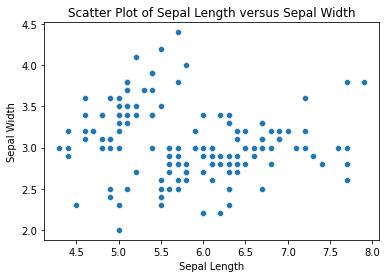

In [65]:
# scatter plot between two variables

# Create a scatter plot of sepal length versus sepal width
sns.scatterplot(data=df, x="sepal_length", y="sepal_width")

# Add a title and axis labels
plt.title("Scatter Plot of Sepal Length versus Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Display the plot
plt.show()

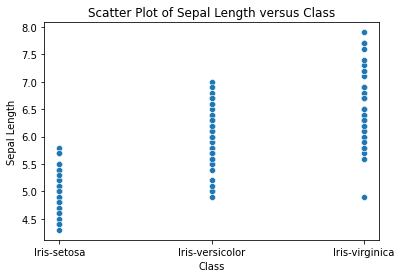

In [67]:
# scatter plot between two variables (one categorical)

# Create a scatter plot of sepal length versus class
sns.scatterplot(data=df, x="class", y="sepal_length")

# Add a title and axis labels
plt.title("Scatter Plot of Sepal Length versus Class")
plt.xlabel("Class")
plt.ylabel("Sepal Length")

# Display the plot
plt.show()

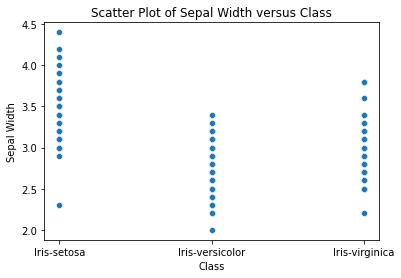

In [68]:
# scatter plot between two variables (one categorical)

# Create a scatter plot of sepal width versus class
sns.scatterplot(data=df, x="class", y="sepal_width")

# Add a title and axis labels
plt.title("Scatter Plot of Sepal Width versus Class")
plt.xlabel("Class")
plt.ylabel("Sepal Width")

# Display the plot
plt.show()

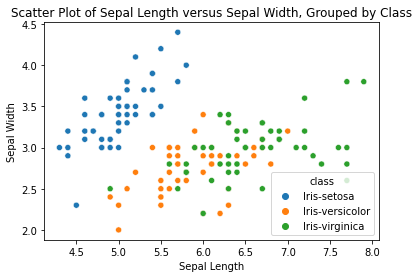

In [92]:
# scatter plot between two variables grouped according to a categorical variable

# Create a scatter plot of sepal length versus sepal width, grouped by class
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="class")

# Add a title and axis labels
plt.title("Scatter Plot of Sepal Length versus Sepal Width, Grouped by Class")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Display the plot
plt.show()

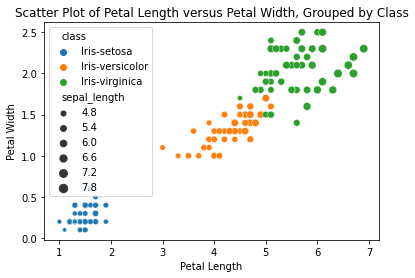

In [93]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers

# Create a scatter plot of petal length versus petal width, grouped by class,
# with size markers based on sepal length
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="class", size="sepal_length")

# Add a title and axis labels
plt.title("Scatter Plot of Petal Length versus Petal Width, Grouped by Class")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Display the plot
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


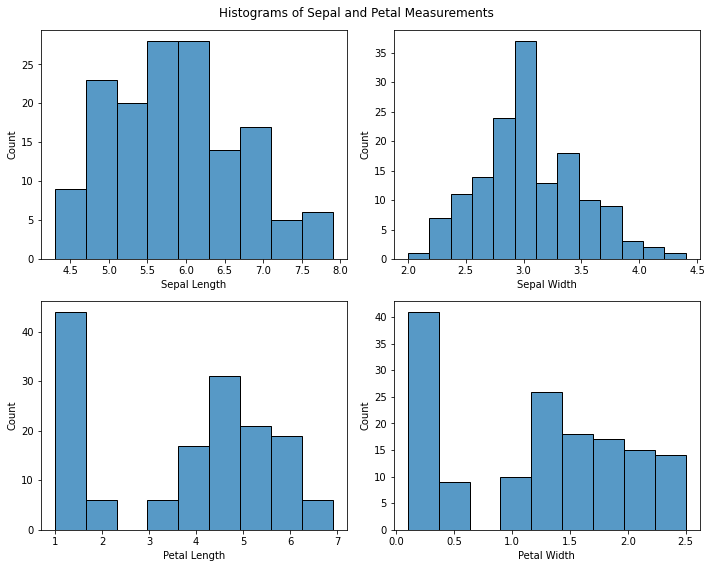

In [73]:
# 1. Plot the histograms for each of the four quantitative variables

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Create histograms for each of the four quantitative variables
sns.histplot(data=df, x="sepal_length", ax=axs[0, 0])
sns.histplot(data=df, x="sepal_width", ax=axs[0, 1])
sns.histplot(data=df, x="petal_length", ax=axs[1, 0])
sns.histplot(data=df, x="petal_width", ax=axs[1, 1])

# Add a title and axis labels
plt.suptitle("Histograms of Sepal and Petal Measurements")
axs[0, 0].set(xlabel="Sepal Length")
axs[0, 1].set(xlabel="Sepal Width")
axs[1, 0].set(xlabel="Petal Length")
axs[1, 1].set(xlabel="Petal Width")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

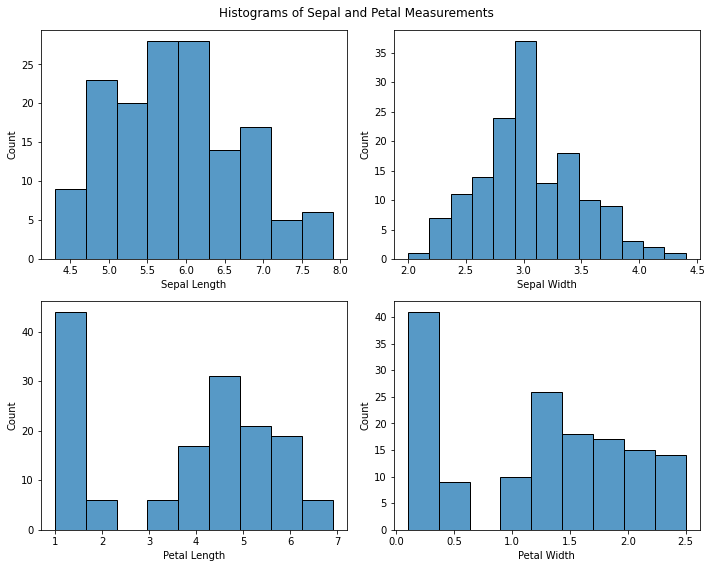

In [74]:
# 2. Plot the histograms for each of the quantitative variables

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Create histograms for each of the four quantitative variables
sns.histplot(data=df, x="sepal_length", ax=axs[0, 0])
sns.histplot(data=df, x="sepal_width", ax=axs[0, 1])
sns.histplot(data=df, x="petal_length", ax=axs[1, 0])
sns.histplot(data=df, x="petal_width", ax=axs[1, 1])

# Add a title and axis labels
plt.suptitle("Histograms of Sepal and Petal Measurements")
axs[0, 0].set(xlabel="Sepal Length")
axs[0, 1].set(xlabel="Sepal Width")
axs[1, 0].set(xlabel="Petal Length")
axs[1, 1].set(xlabel="Petal Width")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

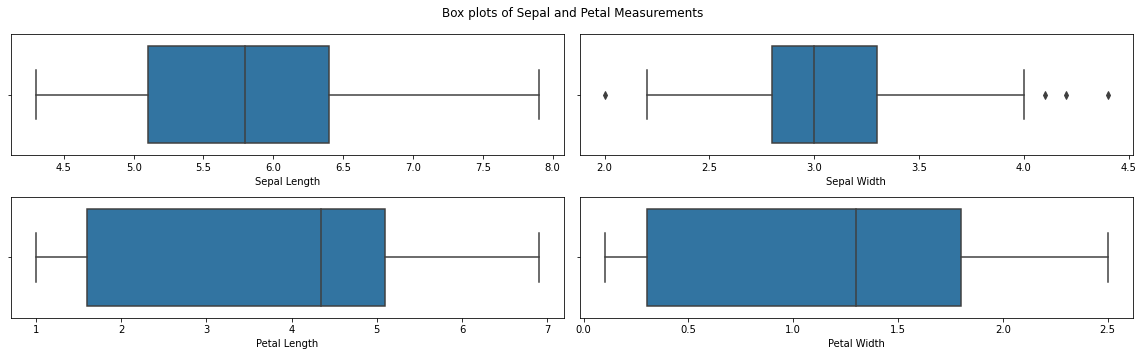

In [83]:
# 3. Plot the boxplots for each of the quantitative variables

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(16, 5))

# Create a boxplot for each quantitative variable
sns.boxplot(data=df, x="sepal_length", ax=axs[0, 0])
sns.boxplot(data=df, x="sepal_width", ax=axs[0, 1])
sns.boxplot(data=df, x="petal_length", ax=axs[1, 0])
sns.boxplot(data=df, x="petal_width", ax=axs[1, 1])

# Add a title and axis labels
plt.suptitle("Box plots of Sepal and Petal Measurements")
axs[0, 0].set(xlabel="Sepal Length")
axs[0, 1].set(xlabel="Sepal Width")
axs[1, 0].set(xlabel="Petal Length")
axs[1, 1].set(xlabel="Petal Width")

# Show the plot
plt.tight_layout()
plt.show()

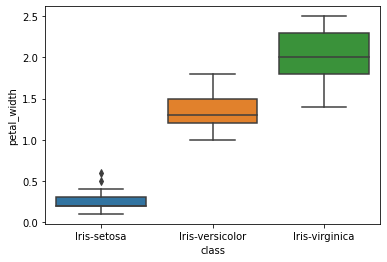

In [88]:
# 4. Plot the boxplots of the petal width grouped by type of flower

sns.boxplot(x="class", y="petal_width", data=df)
plt.show()

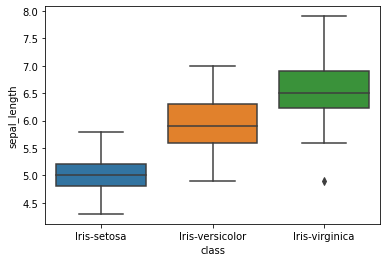

In [87]:
# 5. Plot the boxplots of the setal length grouped by type of flower

# setal ? (Petal / sePal)
# ...
# heu(setal) => sepal

sns.boxplot(x="class", y="sepal_length", data=df)
plt.show()

In [ ]:
# 6. Provide a description (explaination from your observations) of each of the quantitative variables

- Sepal Length: The sepal length data is roughly normally distributed with a mean of around 5.8 cm and a range of 4.3 to 7.9 cm.

- Sepal Width: The sepal width data is also roughly normally distributed with a mean of around 3.1 cm and a range of 2.0 to 4.4 cm.

- Petal Length: The petal length data is significantly more spread out than the sepal data, with a mean of around 3.8 cm and a range of 1.0 to 6.9 cm. The distribution is strongly skewed to the right, indicating that there are a significant number of flowers with long petals.

- Petal Width: The petal width data is also more spread out than the sepal data, with a mean of around 1.2 cm and a range of 0.1 to 2.5 cm. The distribution is less skewed than the petal length data, but still slightly skewed to the right.